# Batch Perceptron Algorithm (Algorithm 3 in Chapter 5) 

First lets get some sample data

In [2]:
import numpy as np

def generate_random_data_sample(sample_size, feature_dim, num_classes):
    # Create synthetic data using NumPy.
    Y = np.random.randint(size=(sample_size, 1), low=0, high=num_classes)

    # Make sure that the data is separable
    X = (np.random.randn(sample_size, feature_dim)+4) * (Y*1.5+1)
    X = X.astype(np.float32)
    # converting class 0 into the vector "1 0 0",
    # class 1 into vector "0 1 0", ...
    class_ind = [Y==class_number for class_number in range(num_classes)]
    Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    return X, Y

# Ensure we always get the same amount of randomness
#np.random.seed(51859)
np.random.seed(982168)

# Define the data dimensions
input_dim = 2
num_output_classes = 2

# Create the input variables denoting the features and the label data. Note: the input
# does not need additional info on number of observations (Samples) since CNTK first create only
# the network tooplogy first
mysamplesize = 128
features, labels = generate_random_data_sample(mysamplesize, input_dim, num_output_classes)



### FOR DEBUGGING
#mysamplesize = 2
#features = np.array( [[1,1],[8,8]] )
#labels = np.array( [[1.,0.],[0.,1.]])




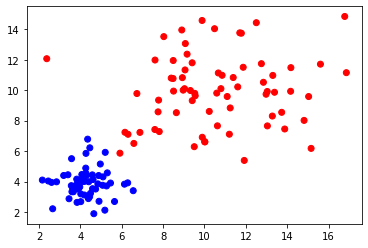

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# given this is a 2 class
colors = ['r' if l == 0 else 'b' for l in labels[:,0]]
plt.scatter(features[:,0], features[:,1], c=colors)
plt.show()

In [4]:


def batch_perceptron(features, labels, learn_factor=.1 ):

    (samplesize, input_dim) = features.shape
    #learning factor 
    learn_factor = .001

    #set random weights 
    #weights = np.random.randn(input_dim+1,1)
    new_weights = np.ones(input_dim+1).reshape(input_dim+1,1)

    #add ones to features 
    features_ones = np.append(features, np.full((samplesize,1), 1), 1)

    #map labels to an array of -1s and 1s 
    signed_labels = np.where(labels[:,0] == 0,0,1).reshape(samplesize,1)

    ## Start function 

    iteration = 0

    max_iterations = 100
    sum_point_distance = np.zeros(max_iterations)
    errors = np.zeros(max_iterations)
    num_mispredictions = np.zeros(max_iterations)

    while iteration < max_iterations :    
        dot_products = features_ones.dot(new_weights)    
        predictions = np.where( dot_products < 0, 0, 1)
        
        
        #np.multiply(predictions, signed_labels)
            
        #failure_idxs = np.where(scores<0)[0]        
        #logging
        #num_mispredictions[iteration] = failure_idxs.size
        #sum_point_distance[iteration] = np.absolute(features_ones.dot(new_weights).sum(0))    
        #failed_features = features_ones[failure_idxs,:]    
        
        #update = learn_factor*failed_features.sum(0).reshape(input_dim+1,1)        
        update = learn_factor * ((signed_labels - predictions)*features_ones).sum(0).reshape(input_dim+1,1)
        
        new_weights = np.add(new_weights, update)
        
        
        #logging
        errors[iteration] = np.absolute(update.sum(0)).item()
        
        iteration = iteration+1
        
        if(np.absolute(update.sum(0)).item() == 0):
            break


# #learning factor 
# learn_factor = .001

# #set random weights 
# #weights = np.random.randn(input_dim+1,1)
# new_weights = np.ones(input_dim+1).reshape(input_dim+1,1)

# #add ones to features 
# features_ones = np.append(features, np.full((mysamplesize,1), 1), 1)

# #map labels to an array of -1s and 1s 
# signed_labels = np.where(labels[:,0] == 0,0,1).reshape(mysamplesize,1)

# ## Start function 

# iteration = 0

# max_iterations = 100
# sum_point_distance = np.zeros(max_iterations)
# errors = np.zeros(max_iterations)
# num_mispredictions = np.zeros(max_iterations)

# while iteration < max_iterations :    
#     dot_products = features_ones.dot(new_weights)    
#     predictions = np.where( dot_products < 0, 0, 1)
    
    
#     #np.multiply(predictions, signed_labels)
        
#     #failure_idxs = np.where(scores<0)[0]        
#     #logging
#     #num_mispredictions[iteration] = failure_idxs.size
#     #sum_point_distance[iteration] = np.absolute(features_ones.dot(new_weights).sum(0))    
#     #failed_features = features_ones[failure_idxs,:]    
    
#     #update = learn_factor*failed_features.sum(0).reshape(input_dim+1,1)        
#     update = learn_factor * ((signed_labels - predictions)*features_ones).sum(0).reshape(input_dim+1,1)
    
#     new_weights = np.add(new_weights, update)
    
    
#     #logging
#     errors[iteration] = np.absolute(update.sum(0)).item()
    
#     iteration = iteration+1
    
#     if(np.absolute(update.sum(0)).item() == 0):
#         break
        
    
    
    
plt.figure()
plt.plot(sum_point_distance)
plt.title('sum_point_distance')

plt.figure()
plt.plot(errors)
plt.title('errors')

plt.figure()
plt.plot(num_mispredictions)
plt.title('num_mispredictions')

plt.figure()
colors = ['r' if l == 0 else 'b' for l in labels[:,0]]
plt.scatter(features[:,0], features[:,1], c=colors)
xint = -new_weights[2,0]/new_weights[0,0]
yint = -new_weights[2,0]/new_weights[1,0]
plt.plot((xint,0),(0,yint))

plt.show()



NameError: name 'sum_point_distance' is not defined

In [197]:
new_weights

array([[0.2],
       [0.2],
       [0.9]])